# Exploring the Quasar Absorption features

Possibly using stack plot from `linetools`

Note: `cgm_abs_sys.stack_plot()` plots the same plot twice regardless if there are more components or abslines...dont use the built in methods for stack plot right now.

In [1]:
from pyigm.cgm import cgmsurvey
from linetools.spectra.io import readspec
import linetools

In [2]:
def get_qsoname_from_string(filename):
    """ Find the QSO name (JXXXX+XXXX) in a string, usually the file path.

    Args:
        filename (str): path with qso file

    Returns:
        qsoname (str): qso name (JXXXX+XXXX)


    """
    #if "J0226+001" not in filename:
    #    qso_name = filename[filename.find('J'):filename.find('J') + 10]
    #else:
    #    qso_name = filename[filename.find('J'):filename.find('J') + 9]
    qso_name = filename[filename.find('J'):filename.find('J') + 10]

    return qso_name

def attach_spectra(cgm_survey, data_path='../data/spectra/'):
    for name in cgm_survey._data['Name']:
        # get the base name from the longer form associated with cgm abs systems
        qso_name = get_qsoname_from_string(name)
        # point to the correct path
        specfile = data_path+qso_name+'_nbin3_norm.fits'
        # crate an Xspec1D object from the spec
        spec = readspec(specfile)
        # attach the spec object to each absorption line in each component for each galaxy
        cgm_abs_sys = cgm_survey.get_cgmsys(name)
        for comp in cgm_abs_sys._components:
            for absline in comp._abslines:
                absline.analy['spec'] = spec

### Load in a CGMSurvey object containing the CGM$^2$ data

In [3]:
survey_file = '../data/cgmsquared_cgmsurvey_aodm_v4.json'

In [4]:
cgm_survey = cgmsurvey.CGMAbsSurvey.from_json(survey_file, chk_z=False, verbose=False, build_sys=True)

read_sets: Using set file -- 
  /Users/mwilde/python/linetools/linetools/lists/sets/llist_v1.2.ascii
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12


### This survey object contains 953 CGM systems

In [5]:
cgm_survey

<CGM_Survey:  nsys=953, ref=>

### In order to plot the absorption lines, we need to provide a spectrum. We can attach a spectrum by specifying a file and then turning it into a `XSpectrum1D` object. 

We need the path the spectrum.

In [6]:
attach_spectra(cgm_survey, data_path='../data/spectra/')    

### The `CGMSurvey` is made up of galaxy-absorber pairs based on our matching criteria. We can access them in a variety of ways. An easy way is for us to get the `CGMAbsSys` for a galaxy we are interested in. 

In [7]:
cgm_abs_sys = cgm_survey.get_cgmsys('J1233-0031_247_12')

In [8]:
cgm_abs_sys

<CGMAbsSys: J1233-0031_247_12 Galaxy RA/DEC=12:33:03.1091-00:31:38.748, zgal=0.318743, rho=56.8678 kpc>

### cgm_abs objects are the galaxy/absorber pairs

They are python objects with methods and attributes. Each one can access both the absorber or the galay via
* `cgm_abs_sys.igm_sys`
* `cgm_abs_sys.galaxy`

### In order to study the absorbers we need to access the igm_sys. These are made up of `components`. Each component is made up of `AbsLines`

Note that these are python objects with methods and attributes

Here is an igm systems which contains info on the absorbers

In [9]:
cgm_abs_sys.igm_sys

<IGMSystem: IGMSystem 12:33:03.8415 -00:31:34.1821, zabs=0.318743, Z/H=0, NHI=15.7214>

### For this particular absorber-galaxy pair, we have 9 components

In [10]:
cgm_abs_sys.igm_sys._components

[<AbsComponent: 12:33:03.84 -00:31:34.176, Name=HI_z0.31818, Zion=(1,1), Ej=0 1 / cm, z=0.318743, vlim=-166.804 km / s,-89.4211 km / s, logN=14.2625, sig_logN=[0.04624026 0.04624026], flag_N=1>,
 <AbsComponent: 12:33:03.84 -00:31:34.176, Name=OVI_z0.31820, Zion=(8,6), Ej=0 1 / cm, z=0.318743, vlim=-155.227 km / s,-91.6908 km / s, logN=14.0745, sig_logN=[0.05242471 0.05242471], flag_N=1>,
 <AbsComponent: 12:33:03.84 -00:31:34.176, Name=CIII_z0.31820, Zion=(6,3), Ej=0 1 / cm, z=0.318743, vlim=-150.513 km / s,-95.9372 km / s, logN=13.2458, sig_logN=[0.07340846 0.07340846], flag_N=1>,
 <AbsComponent: 12:33:03.84 -00:31:34.176, Name=HI_z0.31849, Zion=(1,1), Ej=0 1 / cm, z=0.318743, vlim=-88.3216 km / s,-26.415 km / s, logN=14.9604, sig_logN=[0.04497997 0.04497997], flag_N=1>,
 <AbsComponent: 12:33:03.84 -00:31:34.176, Name=SVI_z0.31863, Zion=(16,6), Ej=0 1 / cm, z=0.318743, vlim=-55.1322 km / s,3.51617 km / s, logN=13.0491, sig_logN=[0.11631044 0.11631044], flag_N=1>,
 <AbsComponent: 12:33:

its also ok to access the components directly from the `CGMAbsSys`

In [11]:
cgm_abs_sys._components

[<AbsComponent: 12:33:03.84 -00:31:34.176, Name=HI_z0.31818, Zion=(1,1), Ej=0 1 / cm, z=0.318743, vlim=-166.804 km / s,-89.4211 km / s, logN=14.2625, sig_logN=[0.04624026 0.04624026], flag_N=1>,
 <AbsComponent: 12:33:03.84 -00:31:34.176, Name=OVI_z0.31820, Zion=(8,6), Ej=0 1 / cm, z=0.318743, vlim=-155.227 km / s,-91.6908 km / s, logN=14.0745, sig_logN=[0.05242471 0.05242471], flag_N=1>,
 <AbsComponent: 12:33:03.84 -00:31:34.176, Name=CIII_z0.31820, Zion=(6,3), Ej=0 1 / cm, z=0.318743, vlim=-150.513 km / s,-95.9372 km / s, logN=13.2458, sig_logN=[0.07340846 0.07340846], flag_N=1>,
 <AbsComponent: 12:33:03.84 -00:31:34.176, Name=HI_z0.31849, Zion=(1,1), Ej=0 1 / cm, z=0.318743, vlim=-88.3216 km / s,-26.415 km / s, logN=14.9604, sig_logN=[0.04497997 0.04497997], flag_N=1>,
 <AbsComponent: 12:33:03.84 -00:31:34.176, Name=SVI_z0.31863, Zion=(16,6), Ej=0 1 / cm, z=0.318743, vlim=-55.1322 km / s,3.51617 km / s, logN=13.0491, sig_logN=[0.11631044 0.11631044], flag_N=1>,
 <AbsComponent: 12:33:

### The second component has 2 OVI `AbsLine`s associated with it

In [12]:
cgm_abs_sys._components[1]._abslines

[<AbsLine: OVI 1031, z=0.3182 wrest=1031.9261 Angstrom, f=0.1325>,
 <AbsLine: OVI 1037, z=0.3182 wrest=1037.6167 Angstrom, f=0.0658>]

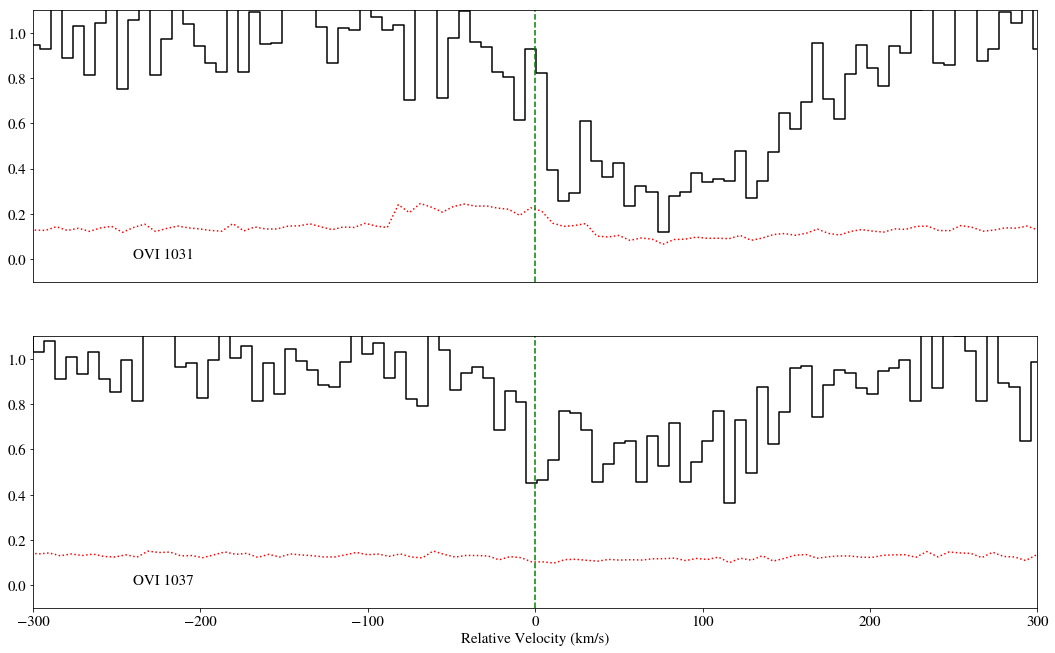

In [13]:
linetools.analysis.plots.stack_plot(cgm_abs_sys._components[1]._abslines)

### The first component has has 5 HI lines

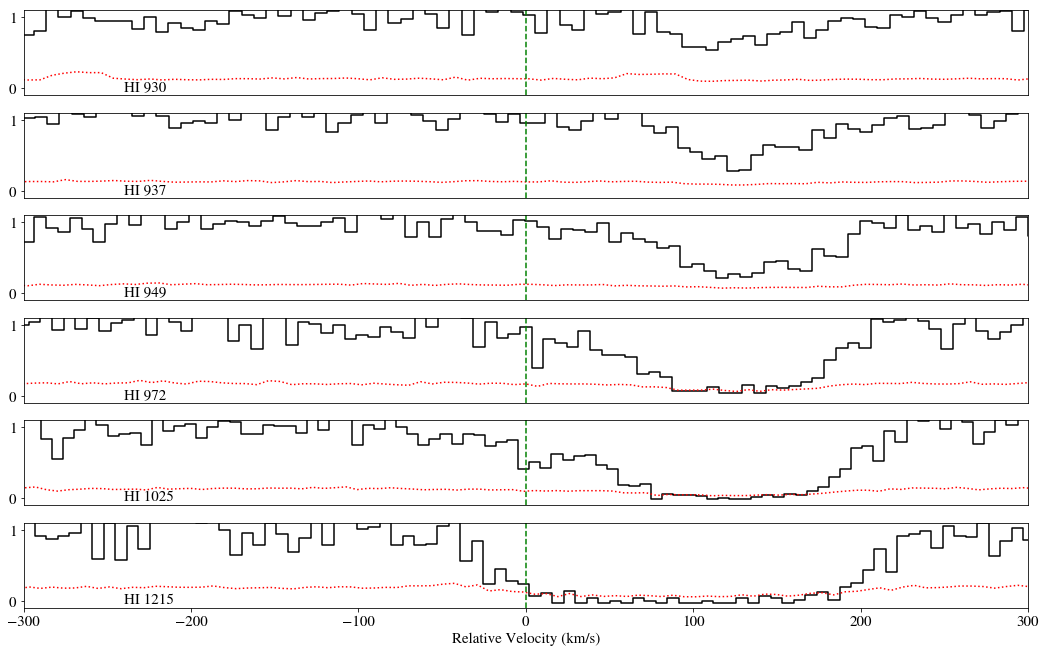

In [14]:
linetools.analysis.plots.stack_plot(cgm_abs_sys._components[0]._abslines)

### To look the spectrum via `lt_xspec` we need the spec and the galaxy redshift. Copy and past this into a terminal

In [15]:
spec_path = cgm_abs_sys._components[0]._abslines[0].analy['spec'].filename
redshift = str(cgm_abs_sys.z)
print("lt_xspec "+spec_path+" -z "+redshift)

lt_xspec ../data/spectra/J1233-0031_nbin3_norm.fits -z 0.3187429


### Save a pdf

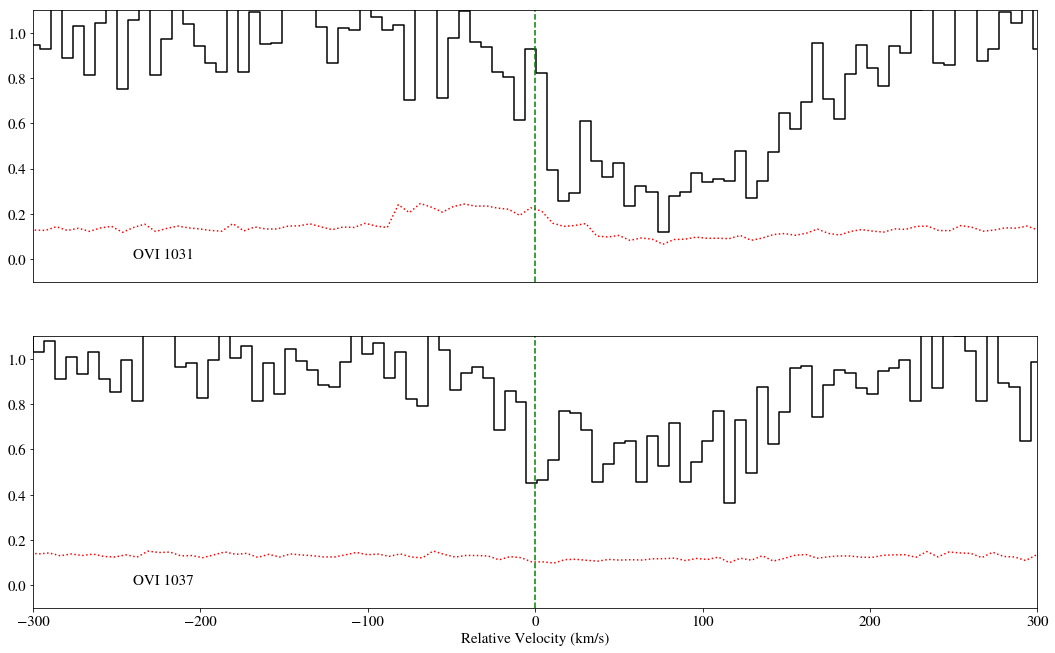

Saving: J1233-0031_247_12_comp_OVI_z0.31820.pdf to ../figs/


In [16]:
to_plot = cgm_abs_sys._components[1]
fig = linetools.analysis.plots.stack_plot(to_plot._abslines, return_fig=True)
fig_path = '../figs/'
save_file = cgm_abs_sys.name + "_comp_" + to_plot.name+".pdf"
print(f"Saving: {save_file} to {fig_path}")
fig.savefig(fig_path+save_file)